In [2]:
from sklearn.model_selection import GridSearchCV, cross_validate, GroupShuffleSplit

In [3]:
from sklearn.datasets import make_blobs

In [4]:
import matplotlib.pyplot as plt

In [5]:
X, y = make_blobs(n_samples=500,n_features=2,centers=2,random_state=0)

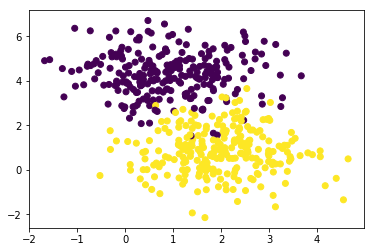

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=4)

In [9]:
x_train

array([[-1.31234996e+00,  4.55527174e+00],
       [ 2.56665690e-01,  3.49079434e+00],
       [ 1.25619468e+00,  4.20563694e+00],
       [ 3.13950603e+00,  5.64031528e+00],
       [ 1.52256473e+00,  1.98841339e+00],
       [-9.24065914e-03,  2.83195232e+00],
       [ 2.98567602e+00,  7.22347258e-01],
       [ 2.50904929e+00,  5.77314610e+00],
       [ 2.23919302e+00,  5.12173900e-01],
       [-1.27929415e+00,  3.28128048e+00],
       [ 1.66780883e+00,  4.99853647e+00],
       [ 7.08266708e-01,  5.10624372e+00],
       [ 1.83266184e+00, -1.54155581e-02],
       [ 1.19871821e+00, -6.43923740e-01],
       [ 2.52365276e+00,  2.63354266e+00],
       [ 2.28084919e+00,  2.28680898e+00],
       [-7.79620505e-01,  4.75472179e+00],
       [ 1.74767603e+00,  5.33322616e+00],
       [ 2.92259181e-01,  5.96333812e+00],
       [-1.79912353e-01,  5.08498543e+00],
       [ 9.30566118e-01,  4.52429498e+00],
       [ 2.10290600e+00,  3.22385582e+00],
       [ 1.60146348e+00,  1.30092820e+00],
       [ 2.

In [10]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC

In [11]:
modeller = [AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,GaussianNB,KNeighborsClassifier,
           DecisionTreeClassifier,SVC,LinearSVC]

# AdaBoost

In [12]:
m=AdaBoostClassifier(learning_rate=0.1)

In [13]:
m.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=None)

In [14]:
m.score(x_train,y_train)

0.9701492537313433

In [15]:
m.score(x_test,y_test)

0.9696969696969697

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
confusion_matrix(y_test,m.predict(x_test))

array([[78,  2],
       [ 3, 82]], dtype=int64)

In [37]:
param_grid = {"n_neighbors" : range(1,31,2) ,"algorithm" : ["auto","brute","kd_tree","ball_tree"]}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)

In [38]:
gridSearch.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 31, 2), 'algorithm': ['auto', 'brute', 'kd_tree', 'ball_tree']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
gridSearch.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

In [40]:
gridSearch.cv_results_

C:\Users\gold\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gold\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gold\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gold\Anaconda3\lib\site-packages\sklearn\utils\de

{'mean_fit_time': array([0.00039983, 0.00020013, 0.0006001 , 0.00040002, 0.00332475,
        0.00130153, 0.00020065, 0.        , 0.0003231 , 0.        ,
        0.        , 0.00019917, 0.        , 0.00040021, 0.00020986,
        0.00020037, 0.        , 0.        , 0.00060019, 0.        ,
        0.        , 0.        , 0.        , 0.00470905, 0.003124  ,
        0.        , 0.        , 0.        , 0.        , 0.00020013,
        0.        , 0.        , 0.        , 0.        , 0.00200424,
        0.        , 0.00040441, 0.        , 0.        , 0.        ,
        0.0004024 , 0.        , 0.        , 0.00040536, 0.00201125,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00040302, 0.        , 0.00161171, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'std_fit_time': array([0.00048969, 0.00040026, 0.00048998, 0.00048992, 0.00616183,
        0.00260305, 0.00040131, 0.        , 0.00041401, 0.        ,
        0.   

In [41]:
model = KNeighborsClassifier(n_neighbors=17,algorithm="auto")

In [42]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [43]:
model.score(x_train,y_train)

0.9492537313432836

In [44]:
model.score(x_test,y_test)

0.9878787878787879

In [45]:
y_pred=model.predict(x_test)

In [46]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[78,  2],
       [ 0, 85]], dtype=int64)

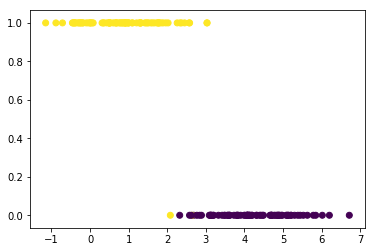

In [47]:
plt.scatter(x_test[:,1],y_test, c=y_pred)

In [48]:
y_pred.shape

(165,)

In [49]:
import pandas as pd

In [50]:
df = pd.DataFrame(gridSearch.cv_results_)

C:\Users\gold\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gold\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gold\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gold\Anaconda3\lib\site-packages\sklearn\utils\de

In [51]:
df.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0004,0.00049,0.007923,0.004004,auto,1,"{'algorithm': 'auto', 'n_neighbors': 1}",0.95,0.95,0.97,...,0.960,0.008944,25,1.0000,1.00,1.0000,1.0000,1.000,1.0000,0.000000
1,0.0002,0.00040,0.003398,0.002798,auto,3,"{'algorithm': 'auto', 'n_neighbors': 3}",0.95,0.94,0.98,...,0.958,0.018330,49,0.9875,0.98,0.9825,0.9875,0.985,0.9845,0.002915


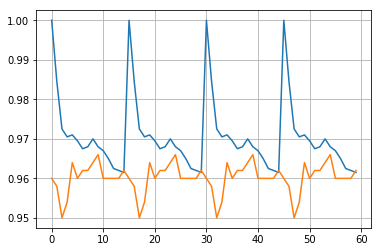

In [52]:
plt.plot(df["mean_train_score"])
plt.plot(df["mean_test_score"])
plt.grid()

### sort_values

In [54]:
df[df["mean_test_score"]>=0.95][["mean_score_time","params"]].sort_values(by=["mean_score_time"], ascending=True)

,mean_score_time,params
22,0.000000,"{'algorithm': 'brute', 'n_neighbors': 15}"
7,0.000000,"{'algorithm': 'auto', 'n_neighbors': 15}"
29,0.002798,"{'algorithm': 'brute', 'n_neighbors': 29}"
39,0.002818,"{'algorithm': 'kd_tree', 'n_neighbors': 19}"
25,0.003125,"{'algorithm': 'brute', 'n_neighbors': 21}"
6,0.003198,"{'algorithm': 'auto', 'n_neighbors': 13}"
1,0.003398,"{'algorithm': 'auto', 'n_neighbors': 3}"
8,0.003398,"{'algorithm': 'auto', 'n_neighbors': 17}"
11,0.003599,"{'algorithm': 'auto', 'n_neighbors': 23}"
36,0.003612,"{'algorithm': 'kd_tree', 'n_neighbors': 13}"


In [55]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000400,0.000490,0.007923,0.004004,auto,1,"{'algorithm': 'auto', 'n_neighbors': 1}",0.95,0.95,0.97,...,0.960,0.008944,25,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.000000
1,0.000200,0.000400,0.003398,0.002798,auto,3,"{'algorithm': 'auto', 'n_neighbors': 3}",0.95,0.94,0.98,...,0.958,0.018330,49,0.9875,0.9800,0.9825,0.9875,0.9850,0.9845,0.002915
2,0.000600,0.000490,0.006988,0.003020,auto,5,"{'algorithm': 'auto', 'n_neighbors': 5}",0.95,0.93,0.97,...,0.950,0.017889,57,0.9775,0.9700,0.9700,0.9750,0.9700,0.9725,0.003162
3,0.000400,0.000490,0.006923,0.005047,auto,7,"{'algorithm': 'auto', 'n_neighbors': 7}",0.96,0.94,0.96,...,0.954,0.017436,53,0.9750,0.9775,0.9600,0.9750,0.9650,0.9705,0.006782
4,0.003325,0.006162,0.004124,0.006067,auto,9,"{'algorithm': 'auto', 'n_neighbors': 9}",0.97,0.94,0.97,...,0.964,0.013565,5,0.9750,0.9775,0.9625,0.9725,0.9675,0.9710,0.005385


In [56]:
param_grid = {"C" : [0.01,0.1,1,10] ,"kernel" : ["rbf","sigmoid","linear","poly"]}
gridSearch = GridSearchCV(SVC(), param_grid=param_grid, cv=5, n_jobs=-1, return_train_score=True)

In [57]:
gridSearch.fit(X,y)

C:\Users\gold\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [58]:
gridSearch.best_estimator_

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
data = pd.DataFrame(gridSearch.cv_results_)

In [61]:
data[data["mean_test_score"]>=0.95][["mean_test_score","params"]]

,mean_test_score,params
0,0.964,"{'C': 0.01, 'kernel': 'rbf'}"
2,0.964,"{'C': 0.01, 'kernel': 'linear'}"
3,0.960,"{'C': 0.01, 'kernel': 'poly'}"
4,0.960,"{'C': 0.1, 'kernel': 'rbf'}"
6,0.964,"{'C': 0.1, 'kernel': 'linear'}"
7,0.960,"{'C': 0.1, 'kernel': 'poly'}"
8,0.956,"{'C': 1, 'kernel': 'rbf'}"
10,0.964,"{'C': 1, 'kernel': 'linear'}"
11,0.956,"{'C': 1, 'kernel': 'poly'}"
12,0.954,"{'C': 10, 'kernel': 'rbf'}"


In [62]:
data.sort_values(by=["mean_train_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,0.008433,0.003206,0.003215,0.003938,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.47,0.38,0.47,...,0.456,0.038262,16,0.4225,0.4375,0.4975,0.4450,0.4275,0.4460,0.026907
13,0.006831,0.003931,0.000000,0.000000,10,sigmoid,"{'C': 10, 'kernel': 'sigmoid'}",0.55,0.39,0.51,...,0.508,0.062738,15,0.4550,0.4400,0.5475,0.5050,0.5075,0.4910,0.038878
1,0.014095,0.005497,0.004816,0.003932,0.01,sigmoid,"{'C': 0.01, 'kernel': 'sigmoid'}",0.55,0.62,0.62,...,0.608,0.030594,14,0.6225,0.6000,0.6075,0.6150,0.6100,0.6110,0.007517
5,0.012879,0.003729,0.003621,0.004482,0.1,sigmoid,"{'C': 0.1, 'kernel': 'sigmoid'}",0.50,0.65,0.66,...,0.618,0.062418,13,0.6000,0.6325,0.6400,0.5675,0.6275,0.6135,0.026674
3,0.002418,0.003902,0.001608,0.003215,0.01,poly,"{'C': 0.01, 'kernel': 'poly'}",0.96,0.95,0.96,...,0.960,0.010954,6,0.9650,0.9625,0.9575,0.9675,0.9550,0.9615,0.004637
7,0.008455,0.007130,0.000000,0.000000,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.96,0.95,0.97,...,0.960,0.014142,6,0.9600,0.9650,0.9625,0.9650,0.9575,0.9620,0.002915
4,0.007645,0.007465,0.002009,0.003107,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.96,0.95,0.96,...,0.960,0.010954,6,0.9650,0.9650,0.9625,0.9650,0.9575,0.9630,0.002915
11,0.006434,0.007769,0.001606,0.003211,1,poly,"{'C': 1, 'kernel': 'poly'}",0.96,0.93,0.97,...,0.956,0.018547,9,0.9600,0.9650,0.9650,0.9700,0.9575,0.9635,0.004359
6,0.002014,0.003113,0.002012,0.003113,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.95,0.95,0.96,...,0.964,0.013565,1,0.9700,0.9625,0.9650,0.9625,0.9575,0.9635,0.004062
15,0.024502,0.013218,0.000000,0.000000,10,poly,"{'C': 10, 'kernel': 'poly'}",0.96,0.93,0.96,...,0.952,0.014697,12,0.9600,0.9650,0.9650,0.9700,0.9600,0.9640,0.003742


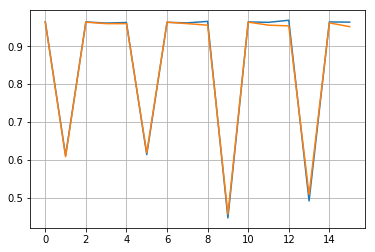

In [63]:
plt.plot(data["mean_train_score"])
plt.plot(data["mean_test_score"])
plt.grid()

In [64]:
gridSearch.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [65]:
import seaborn as sns

In [66]:
from sklearn.metrics import pairwise

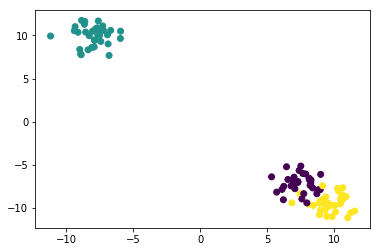

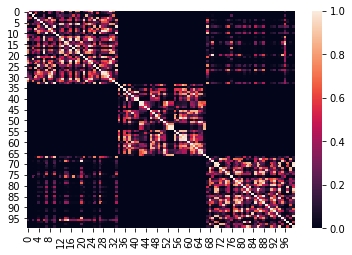

In [67]:
X, y = make_blobs()
plt.figure()
plt.scatter(*X.T, c=y)
X, y = X[y.argsort()], y[y.argsort()]
plt.figure()
sns.heatmap(pairwise.rbf_kernel(X))